In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [136]:
hdata1=pd.read_excel('health.xlsx', sheet_name='2016-17')

In [137]:
hdata1.head()

,P.No.,Name,Test Date,Year,Cycle,Gender,Age,Height,Weight,Division,...,ECG,ECG Remarks,TMT Status,TMT Date,TMT Remarks,Systematic Examination Remarks,Grade,Area,Phone,Email
0,306708,Shyamjee Prasad,21-Jan-2017,2016,1,Male,44,180.0,83,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,E-4,CX - Chasis Assy,7970480859,NaN
1,306833,Sanjay Kumar,30-Sep-2016,2016,1,Male,43,169.0,72,Vehicle Factory (excluding vehicle dispatch),...,WNL,NaN,Negative,NaN,NaN,NaN,E-6,Chassis Assembly,8092730508,NaN
2,302238,S D Singh,12-Jul-2016,2016,2,Male,63,175.0,85,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,TM-A,Vehicle Factory Maint.,NaN,NaN
3,302474,Shatrughna Singh,14-May-2016,2016,1,Male,64,166.0,64,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,302486,Sheo Kumar Singh,21-Jan-2017,2016,1,Male,64,164.0,84,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
hdata1.drop(['P.No.','Cycle','Name','Test Date','Year','Systematic Examination Remarks','Grade','Phone','Email','Division','BP Reading-2','BP Reading-3','FBS','PPBS','Hb1Ac','Chronic Disease Name','Distance Vision','LDL','ECG Remarks','TMT Date','TMT Remarks'], axis=1, inplace=True)

In [140]:
print(hdata1.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'BP Reading-1', 'RBS',
       'Addiction', 'Sick Leave', 'Chronic Disease',
       'Assesment from HealthIndex',
       'Assesment from HealthIndex (Improvement/Deterioration)',
       'HealthIndex Score', 'Addiction Score', 'BMI Score', 'HT Score',
       'DBT Score', 'Leave Score', 'Chronic Score', 'Urea', 'Creatinine',
       'Cholestrarol', 'Triglyceride', 'HDL', 'SGOT', 'SGPT', 'ECG',
       'TMT Status', 'Area'],
      dtype='object')


In [141]:
hdata1.drop_duplicates(inplace=True) 

In [142]:
dups = hdata1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(hdata1.shape)

Number of duplicate rows = 0
(698, 29)


In [143]:
hdata1.Gender=pd.Categorical(hdata1.Gender,{'Male','Female'},ordered=True)

In [33]:
hdata1.Gender

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
693    Male
694    Male
695    Male
696    Male
697    Male
Name: Gender, Length: 698, dtype: category
Categories (2, object): ['Male' < 'Female']

In [34]:
hdata1.Gender=hdata1.Gender.cat.codes

In [35]:
hdata1.Gender #MALE=0,FEMALE=1

0      0
1      0
2      0
3      0
4      0
      ..
693    0
694    0
695    0
696    0
697    0
Name: Gender, Length: 698, dtype: int8

In [36]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,BP Reading-1,RBS,Addiction,Sick Leave,Chronic Disease,...,Urea,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,ECG,TMT Status,Area
0,0,44,180.0,83,25.06,130/80,84.0,Y,0,N,...,16,1,NaN,NaN,NaN,NaN,NaN,NaN,Negative,CX - Chasis Assy
1,0,43,169.0,72,25.21,170/110,116.0,N,4,N,...,NaN,1,218,153,41,NaN,NaN,WNL,Negative,Chassis Assembly
2,0,63,175.0,85,27.76,130/80,181.0,Y,9,N,...,NaN,nil,nil,nil,NaN,NaN,NaN,NaN,Negative,Vehicle Factory Maint.
3,0,64,166.0,64,23.23,120/80,94.0,Y,4,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,NaN
4,0,64,164.0,84,31.23,150/90,102.0,Y,1,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,NaN


In [37]:
hdata1.Area.value_counts(normalize=True)

CX - Chasis Assy           0.267477
Chassis Assembly Line 1    0.252280
Chassis Assembly           0.199088
Rec. (Normal/Exp. Ch       0.110942
Vehicle Factory Maint.     0.037994
Vehicle Testing            0.022796
Vehicle Preparation        0.018237
Chassis Assembly -II       0.015198
Mech. Maint. (Truck)       0.013678
Elect. Maint. (Truck       0.013678
EOL & Care Line            0.009119
Silencer & Small Par       0.007599
Chassis Assy Line-4        0.004559
Prod Ctrl (Cab&Cowl)       0.003040
FPIG                       0.003040
Prod   Ctrl (Truck)        0.003040
Rectification Painti       0.003040
SMD Assembly               0.001520
CX - Trim Line             0.001520
Mfg. QA (Veh Fact)         0.001520
Mech. Maint.(Truck-P       0.001520
PPL & Order Fulfilment     0.001520
Production Inspectio       0.001520
Paint Shop  (Frame)        0.001520
CX - Frame Shop            0.001520
Maintenance & Planning     0.001520
Engine Testing             0.001520
Name: Area, dtype: float64

In [38]:
hdata1.Area=pd.Categorical(hdata1.Area,{'CX - Chasis Assy','Chassis Assembly Line 1','Chassis Assembly','Rec. (Normal/Exp. Ch','Vehicle Factory Maint.','Vehicle Testing','Vehicle Preparation','Chassis Assembly -II','Mech. Maint. (Truck)','Elect. Maint. (Truck)', 'EOL & Care Line','Silencer & Small Par','Chassis Assy Line-4','Prod Ctrl (Cab&Cowl)','FPIG','Prod   Ctrl (Truck)','Rectification Painti','SMD Assembly','CX - Trim Line','Mfg. QA (Veh Fact)','Mech. Maint.(Truck-P','PPL & Order Fulfilment','Production Inspectio','Paint Shop  (Frame)','CX - Frame Shop','Maintenance & Planning','Engine Testing'},ordered=True)
hdata1.Area

0             CX - Chasis Assy
1             Chassis Assembly
2       Vehicle Factory Maint.
3                          NaN
4                          NaN
                ...           
693           CX - Chasis Assy
694     Vehicle Factory Maint.
695    Chassis Assembly Line 1
696     Vehicle Factory Maint.
697           Chassis Assembly
Name: Area, Length: 698, dtype: category
Categories (27, object): ['Vehicle Testing' < 'Mech. Maint. (Truck)' < 'Vehicle Factory Maint.' < 'Vehicle Preparation' ... 'Mfg. QA (Veh Fact)' < 'CX - Chasis Assy' < 'Silencer & Small Par' < 'Chassis Assembly Line 1']

In [39]:
hdata1.Area=hdata1.Area.cat.codes
hdata1.Area 

0      24
1      19
2       2
3      -1
4      -1
       ..
693    24
694     2
695    26
696     2
697    19
Name: Area, Length: 698, dtype: int8

In [40]:
hdata1.Addiction=pd.Categorical(hdata1.Addiction,{'Y','N'},ordered=True)
hdata1.Addiction=hdata1.Addiction.cat.codes
hdata1.Addiction  #Y=1,N=0

0      1
1      0
2      1
3      1
4      1
      ..
693    0
694    0
695    0
696    1
697    0
Name: Addiction, Length: 698, dtype: int8

In [41]:
hdata1.rename(columns={'Chronic Disease':'Chronic_Disease'},inplace=True)

In [42]:
hdata1.Chronic_Disease=pd.Categorical(hdata1.Chronic_Disease,{'Y','N'},ordered=True)
hdata1.Chronic_Disease=hdata1.Chronic_Disease.cat.codes
hdata1.Chronic_Disease #Y=1,N=0

0      0
1      0
2      0
3      1
4      0
      ..
693    1
694    0
695    0
696    0
697    1
Name: Chronic_Disease, Length: 698, dtype: int8

In [43]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,BP Reading-1,RBS,Addiction,Sick Leave,Chronic_Disease,...,Urea,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,ECG,TMT Status,Area
0,0,44,180.0,83,25.06,130/80,84.0,1,0,0,...,16,1,NaN,NaN,NaN,NaN,NaN,NaN,Negative,24
1,0,43,169.0,72,25.21,170/110,116.0,0,4,0,...,NaN,1,218,153,41,NaN,NaN,WNL,Negative,19
2,0,63,175.0,85,27.76,130/80,181.0,1,9,0,...,NaN,nil,nil,nil,NaN,NaN,NaN,NaN,Negative,2
3,0,64,166.0,64,23.23,120/80,94.0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,-1
4,0,64,164.0,84,31.23,150/90,102.0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,-1


In [44]:
hdata1['RBS'].fillna(value=hdata1['RBS'].median())

0       84.0
1      116.0
2      181.0
3       94.0
4      102.0
       ...  
693    104.0
694     96.0
695     92.0
696    102.0
697     96.0
Name: RBS, Length: 698, dtype: float64

In [45]:
hdata1['RBS'] = hdata1['RBS'].fillna(value=hdata1['RBS'].median())

In [46]:
hdata1.at[165,'RBS']

135.0

In [47]:
hdata1.rename(columns={'BP Reading-1':'BP'},inplace=True)
hdata1['SBP']=np.nan
hdata1['DBP']=np.nan

In [48]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,BP,RBS,Addiction,Sick Leave,Chronic_Disease,...,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,ECG,TMT Status,Area,SBP,DBP
0,0,44,180.0,83,25.06,130/80,84.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Negative,24,NaN,NaN
1,0,43,169.0,72,25.21,170/110,116.0,0,4,0,...,218,153,41,NaN,NaN,WNL,Negative,19,NaN,NaN
2,0,63,175.0,85,27.76,130/80,181.0,1,9,0,...,nil,nil,NaN,NaN,NaN,NaN,Negative,2,NaN,NaN
3,0,64,166.0,64,23.23,120/80,94.0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,Negative,-1,NaN,NaN
4,0,64,164.0,84,31.23,150/90,102.0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Negative,-1,NaN,NaN


In [49]:
hdata1[['SBP','DBP']]=hdata1['BP'].str.split('/',expand=True)
    

In [50]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,BP,RBS,Addiction,Sick Leave,Chronic_Disease,...,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,ECG,TMT Status,Area,SBP,DBP
0,0,44,180.0,83,25.06,130/80,84.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Negative,24,130,80
1,0,43,169.0,72,25.21,170/110,116.0,0,4,0,...,218,153,41,NaN,NaN,WNL,Negative,19,170,110
2,0,63,175.0,85,27.76,130/80,181.0,1,9,0,...,nil,nil,NaN,NaN,NaN,NaN,Negative,2,130,80
3,0,64,166.0,64,23.23,120/80,94.0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,Negative,-1,120,80
4,0,64,164.0,84,31.23,150/90,102.0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Negative,-1,150,90


In [51]:
hdata1.drop(['BP'],axis=1,inplace=True)

In [52]:
print(hdata1.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'RBS', 'Addiction',
       'Sick Leave', 'Chronic_Disease', 'Assesment from HealthIndex',
       'Assesment from HealthIndex (Improvement/Deterioration)',
       'HealthIndex Score', 'Addiction Score', 'BMI Score', 'HT Score',
       'DBT Score', 'Leave Score', 'Chronic Score', 'Urea', 'Creatinine',
       'Cholestrarol', 'Triglyceride', 'HDL', 'SGOT', 'SGPT', 'ECG',
       'TMT Status', 'Area', 'SBP', 'DBP'],
      dtype='object')


In [53]:
hdata1.drop(['HealthIndex Score','Assesment from HealthIndex (Improvement/Deterioration)','Addiction Score','BMI Score','HT Score','DBT Score','Leave Score','Chronic Score','ECG','TMT Status'],axis=1,inplace=True)

In [54]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Assesment from HealthIndex,Urea,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,Area,SBP,DBP
0,0,44,180.0,83,25.06,84.0,1,0,0,Average Health,16,1,NaN,NaN,NaN,NaN,NaN,24,130,80
1,0,43,169.0,72,25.21,116.0,0,4,0,Best Health,NaN,1,218,153,41,NaN,NaN,19,170,110
2,0,63,175.0,85,27.76,181.0,1,9,0,Average Health,NaN,nil,nil,nil,NaN,NaN,NaN,2,130,80
3,0,64,166.0,64,23.23,94.0,1,4,1,Average Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,120,80
4,0,64,164.0,84,31.23,102.0,1,1,0,Average Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,150,90


In [55]:
hdata1.rename(columns={'Assesment from HealthIndex':'Conclusion'},inplace=True)
hdata1.Conclusion=pd.Categorical(hdata1.Conclusion,{'Poor Health','Average Health','Best Health'},ordered=True)
hdata1.Conclusion=hdata1.Conclusion.cat.codes
hdata1.Conclusion #AverageHealth=2, BestHealth=0, PoorHealth=1

0      2
1      0
2      2
3      2
4      2
      ..
693    2
694    0
695    0
696    0
697    0
Name: Conclusion, Length: 698, dtype: int8

In [56]:
#hdata1.drop([2],axis=0,inplace=True)
for column in hdata1.columns:
    hdata1.drop(index = hdata1[hdata1[column] == 'nil'].index,inplace=True)

In [57]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Urea,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,Area,SBP,DBP
0,0,44,180.0,83,25.06,84.0,1,0,0,2,16,1,NaN,NaN,NaN,NaN,NaN,24,130,80
1,0,43,169.0,72,25.21,116.0,0,4,0,0,NaN,1,218,153,41,NaN,NaN,19,170,110
3,0,64,166.0,64,23.23,94.0,1,4,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,120,80
4,0,64,164.0,84,31.23,102.0,1,1,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,150,90
5,0,63,166.0,80,29.03,113.0,0,12,0,2,24,1,196,148,38,39,41.0,-1,110,70


In [58]:
hdata1.reset_index(inplace=True)

In [59]:
hdata1.head()

,index,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,...,Urea,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,Area,SBP,DBP
0,0,0,44,180.0,83,25.06,84.0,1,0,0,...,16,1,NaN,NaN,NaN,NaN,NaN,24,130,80
1,1,0,43,169.0,72,25.21,116.0,0,4,0,...,NaN,1,218,153,41,NaN,NaN,19,170,110
2,3,0,64,166.0,64,23.23,94.0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,120,80
3,4,0,64,164.0,84,31.23,102.0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,150,90
4,5,0,63,166.0,80,29.03,113.0,0,12,0,...,24,1,196,148,38,39,41.0,-1,110,70


In [60]:
hdata1.drop(['Urea'],axis=1,inplace=True)
hdata1.drop(['index'],axis=1,inplace=True)
hdata1.drop(['SGOT'],axis=1,inplace=True)

In [61]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,HDL,SGPT,Area,SBP,DBP
0,0,44,180.0,83,25.06,84.0,1,0,0,2,1,NaN,NaN,NaN,NaN,24,130,80
1,0,43,169.0,72,25.21,116.0,0,4,0,0,1,218,153,41,NaN,19,170,110
2,0,64,166.0,64,23.23,94.0,1,4,1,2,NaN,NaN,NaN,NaN,NaN,-1,120,80
3,0,64,164.0,84,31.23,102.0,1,1,0,2,NaN,NaN,NaN,NaN,NaN,-1,150,90
4,0,63,166.0,80,29.03,113.0,0,12,0,2,1,196,148,38,41.0,-1,110,70


In [62]:
hdata1['Creatinine'] = hdata1['Creatinine'].fillna(value=hdata1['Creatinine'].median())

In [63]:
hdata1['Cholestrarol'] = hdata1['Cholestrarol'].fillna(value=hdata1['Cholestrarol'].median())

In [64]:
hdata1['Triglyceride'] = hdata1['Triglyceride'].fillna(value=hdata1['Triglyceride'].median())

In [65]:
hdata1['SGPT'] = hdata1['SGPT'].fillna(value=hdata1['SGPT'].median())

In [66]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,HDL,SGPT,Area,SBP,DBP
0,0,44,180.0,83,25.06,84.0,1,0,0,2,1,167.0,146.0,NaN,31.0,24,130,80
1,0,43,169.0,72,25.21,116.0,0,4,0,0,1,218.0,153.0,41,31.0,19,170,110
2,0,64,166.0,64,23.23,94.0,1,4,1,2,0.9,167.0,146.0,NaN,31.0,-1,120,80
3,0,64,164.0,84,31.23,102.0,1,1,0,2,0.9,167.0,146.0,NaN,31.0,-1,150,90
4,0,63,166.0,80,29.03,113.0,0,12,0,2,1,196.0,148.0,38,41.0,-1,110,70


In [67]:
hdata1.drop(['HDL'],axis=1,inplace=True)

In [68]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,SGPT,Area,SBP,DBP
0,0,44,180.0,83,25.06,84.0,1,0,0,2,1,167.0,146.0,31.0,24,130,80
1,0,43,169.0,72,25.21,116.0,0,4,0,0,1,218.0,153.0,31.0,19,170,110
2,0,64,166.0,64,23.23,94.0,1,4,1,2,0.9,167.0,146.0,31.0,-1,120,80
3,0,64,164.0,84,31.23,102.0,1,1,0,2,0.9,167.0,146.0,31.0,-1,150,90
4,0,63,166.0,80,29.03,113.0,0,12,0,2,1,196.0,148.0,41.0,-1,110,70


<AxesSubplot:>

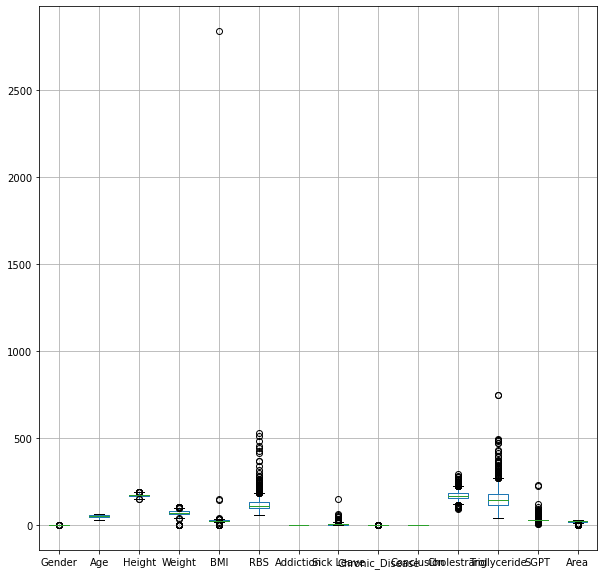

In [69]:
plt.figure(figsize=(10,10))
hdata1.boxplot()

In [70]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [83]:
check = hdata1['Age', 'Height', 'Weight', 'BMI', 'RBS', 'Addiction',
       'Sick Leave', 'Chronic_Disease', 'Conclusion', 'Creatinine',
       'Cholestrarol', 'Triglyceride', 'SGPT', 'SBP', 'DBP']
for column in check:
    if hdata1[column].dtype != 'object': 
        lr,ur=remove_outlier(hdata1[column])
        hdata1[column]=np.where(hdata1[column]>ur,ur,hdata1[column])
        hdata1[column]=np.where(hdata1[column]<lr,lr,hdata1[column])

KeyError: ('Age', 'Height', 'Weight', 'BMI', 'RBS', 'Addiction', 'Sick Leave', 'Chronic_Disease', 'Conclusion', 'Creatinine', 'Cholestrarol', 'Triglyceride', 'SGPT', 'SBP', 'DBP')

In [87]:
print(hdata1.shape)

for column in hdata1.columns:
    hdata1.drop(index = hdata1[hdata1[column] == 2837.37].index,inplace=True)

print(hdata1.shape)

(697, 17)
(696, 17)


<AxesSubplot:>

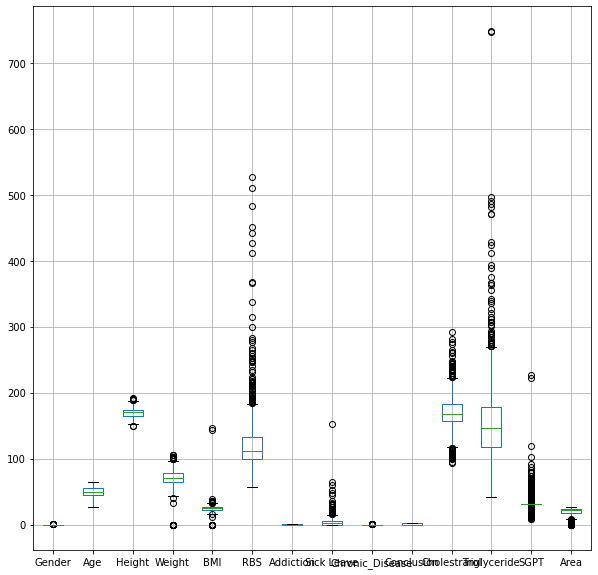

In [88]:
plt.figure(figsize=(10,10))
hdata1.boxplot()

<AxesSubplot:>

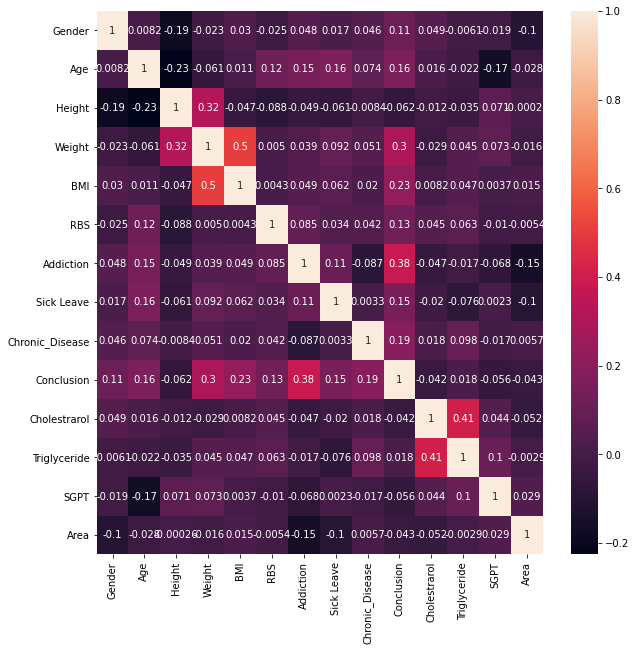

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(hdata1.corr(), annot=True)

In [90]:
hdata1.describe()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Cholestrarol,Triglyceride,SGPT,Area
count,696.000000,696.000000,694.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,0.008621,49.619253,170.077810,69.981322,24.305043,125.840517,0.415230,4.775862,0.054598,0.603448,170.044540,158.734195,33.298851,18.610632
std,0.092513,8.090860,6.733839,13.612878,7.819802,52.364540,0.493116,8.778082,0.227357,0.896477,29.241235,74.918967,15.063981,8.726333
min,0.000000,27.000000,149.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,94.000000,42.000000,8.000000,-1.000000
25%,0.000000,44.000000,165.000000,63.750000,22.047500,99.000000,0.000000,0.000000,0.000000,0.000000,157.000000,116.750000,31.000000,18.000000
50%,0.000000,50.000000,170.000000,70.000000,24.385000,111.000000,0.000000,3.000000,0.000000,0.000000,167.000000,146.000000,31.000000,21.500000
75%,0.000000,56.000000,174.000000,78.000000,26.230000,132.250000,1.000000,6.000000,0.000000,2.000000,183.000000,178.000000,31.000000,24.000000
max,1.000000,65.000000,192.000000,105.000000,147.030000,526.000000,1.000000,152.000000,1.000000,2.000000,292.000000,748.000000,227.000000,26.000000


In [91]:
print(hdata1.shape)

(696, 17)


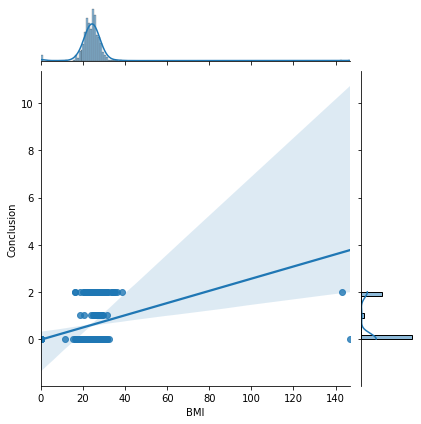

In [92]:
sns.jointplot(x='BMI', y='Conclusion',data=hdata1, kind='reg')

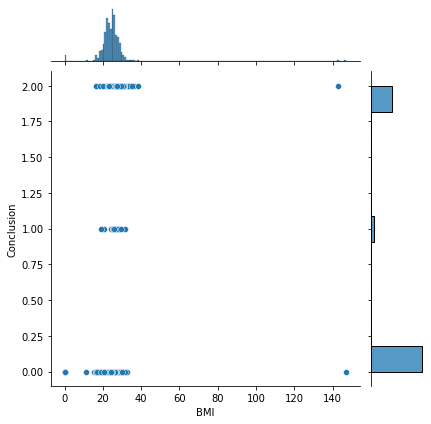

In [93]:
sns.jointplot(x='BMI', y='Conclusion',data=hdata1, kind='scatter')

<Figure size 1440x1440 with 0 Axes>

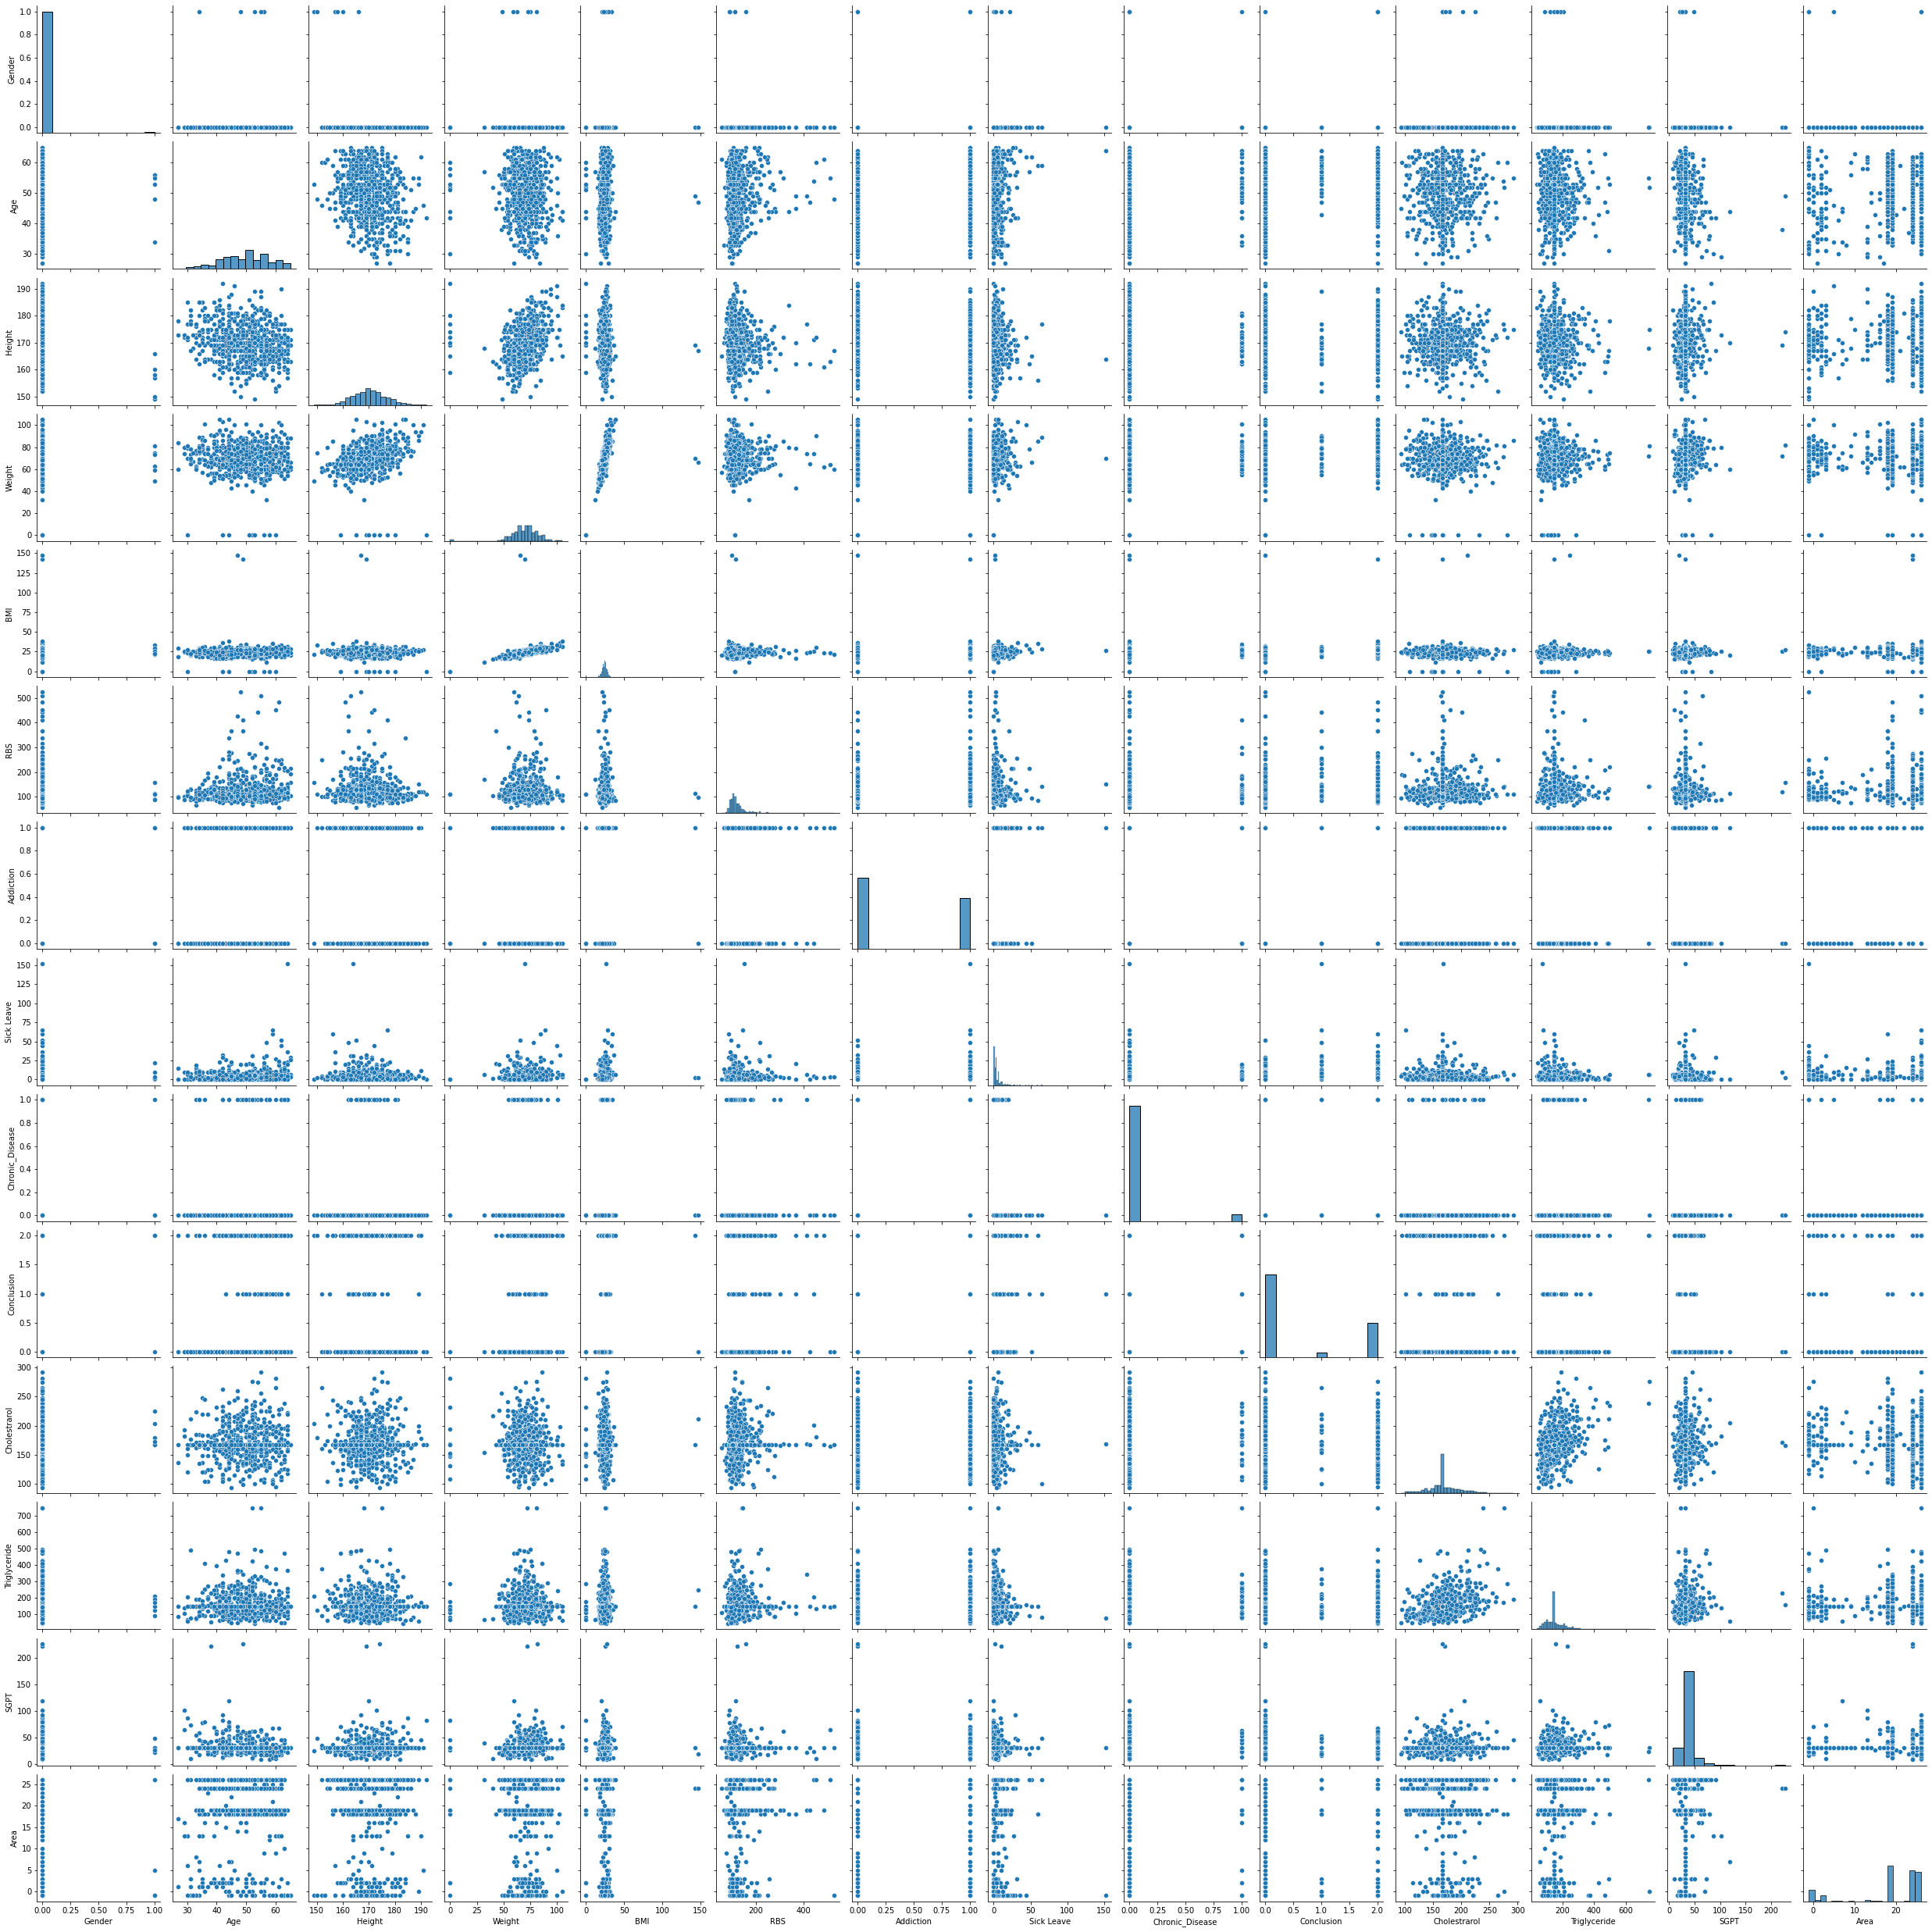

In [94]:
plt.figure(figsize=(20,20))
sns.pairplot(hdata1)

In [95]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,SGPT,Area,SBP,DBP
0,0,44,180.0,83,25.06,84.0,1,0,0,2,1,167.0,146.0,31.0,24,130,80
1,0,43,169.0,72,25.21,116.0,0,4,0,0,1,218.0,153.0,31.0,19,170,110
2,0,64,166.0,64,23.23,94.0,1,4,1,2,0.9,167.0,146.0,31.0,-1,120,80
3,0,64,164.0,84,31.23,102.0,1,1,0,2,0.9,167.0,146.0,31.0,-1,150,90
4,0,63,166.0,80,29.03,113.0,0,12,0,2,1,196.0,148.0,41.0,-1,110,70


<AxesSubplot:>

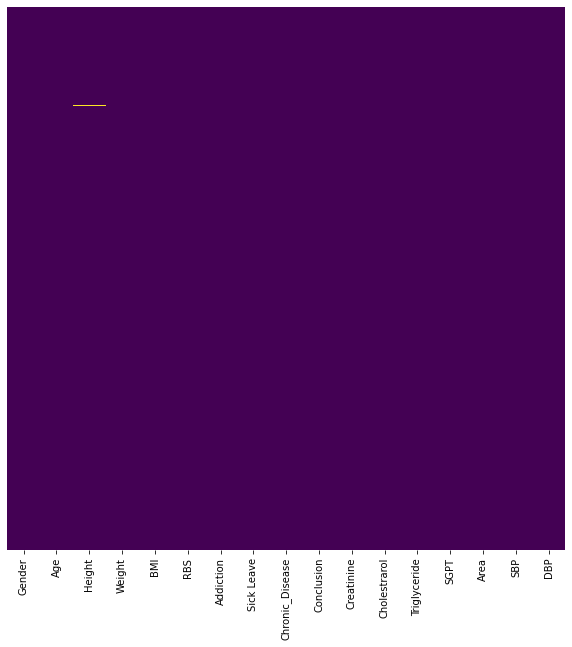

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(hdata1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [97]:
hdata1['Height'] = hdata1['Height'].fillna(value=hdata1['Height'].median())

<AxesSubplot:>

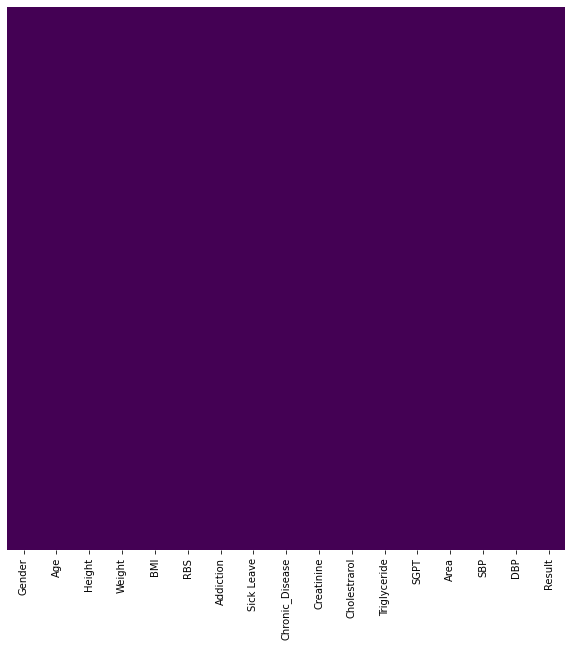

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(hdata1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [122]:
hdata1['SBP'] = hdata1['SBP'].fillna(value=hdata1['SBP'].median())
hdata1['DBP'] = hdata1['DBP'].fillna(value=hdata1['DBP'].median())

<function matplotlib.pyplot.show(close=None, block=None)>

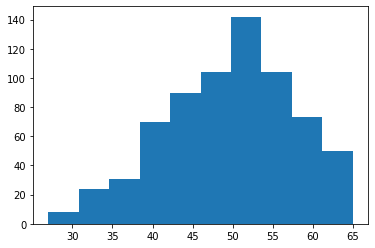

In [123]:
plt.hist(hdata1.Age)
plt.show

In [124]:
hdata1['Result'] = hdata1.Conclusion

AttributeError: 'DataFrame' object has no attribute 'Conclusion'

In [101]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,SGPT,Area,SBP,DBP,Result
0,0,44,180.0,83,25.06,84.0,1,0,0,2,1,167.0,146.0,31.0,24,130,80,2
1,0,43,169.0,72,25.21,116.0,0,4,0,0,1,218.0,153.0,31.0,19,170,110,0
2,0,64,166.0,64,23.23,94.0,1,4,1,2,0.9,167.0,146.0,31.0,-1,120,80,2
3,0,64,164.0,84,31.23,102.0,1,1,0,2,0.9,167.0,146.0,31.0,-1,150,90,2
4,0,63,166.0,80,29.03,113.0,0,12,0,2,1,196.0,148.0,41.0,-1,110,70,2


In [102]:
hdata1.drop(['Conclusion'],axis=1,inplace=True)

In [103]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Creatinine,Cholestrarol,Triglyceride,SGPT,Area,SBP,DBP,Result
0,0,44,180.0,83,25.06,84.0,1,0,0,1,167.0,146.0,31.0,24,130,80,2
1,0,43,169.0,72,25.21,116.0,0,4,0,1,218.0,153.0,31.0,19,170,110,0
2,0,64,166.0,64,23.23,94.0,1,4,1,0.9,167.0,146.0,31.0,-1,120,80,2
3,0,64,164.0,84,31.23,102.0,1,1,0,0.9,167.0,146.0,31.0,-1,150,90,2
4,0,63,166.0,80,29.03,113.0,0,12,0,1,196.0,148.0,41.0,-1,110,70,2


In [104]:
hdata1["SBP"] = pd.to_numeric(hdata1["SBP"], downcast="integer")
hdata1["DBP"] = pd.to_numeric(hdata1["DBP"], downcast="integer")

In [111]:
hdata1.shape

(696, 17)

In [112]:
hdata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 696
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           696 non-null    int8   
 1   Age              696 non-null    int64  
 2   Height           696 non-null    float64
 3   Weight           696 non-null    int64  
 4   BMI              696 non-null    float64
 5   RBS              696 non-null    float64
 6   Addiction        696 non-null    int8   
 7   Sick Leave       696 non-null    int64  
 8   Chronic_Disease  696 non-null    int8   
 9   Creatinine       696 non-null    object 
 10  Cholestrarol     696 non-null    float64
 11  Triglyceride     696 non-null    float64
 12  SGPT             696 non-null    float64
 13  Area             696 non-null    int8   
 14  SBP              684 non-null    float64
 15  DBP              684 non-null    float64
 16  Result           696 non-null    int8   
dtypes: float64(8), i

In [113]:
hdata1["Creatinine"] = pd.to_numeric(hdata1["Creatinine"], downcast="integer")

In [125]:
hdata1.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'RBS', 'Addiction',
       'Sick Leave', 'Chronic_Disease', 'Creatinine', 'Cholestrarol',
       'Triglyceride', 'SGPT', 'Area', 'SBP', 'DBP', 'Result'],
      dtype='object')

In [126]:
X=hdata1.iloc[:, :-1].values
y=hdata1.iloc[:,-1].values

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=41, stratify=hdata1['Result'])

In [128]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [129]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=41)
lr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=41)

In [176]:
lr.predict(X_test)

array([0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 0., 2.,
       2., 0., 2., 2., 1., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 0., 2.,
       0., 2., 0., 2., 2., 2., 2., 0., 2., 0., 0., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 0., 0., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
       2., 0., 2., 0., 2., 2., 2., 2., 2., 2., 0., 0., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2.,
       0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 1.])

In [130]:
y_pred=lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

[[0 2]
 [0 2]
 [2 2]
 [2 2]
 [0 0]
 [2 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 2]
 [2 2]
 [0 0]
 [1 0]
 [0 0]
 [2 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 1]
 [0 0]
 [0 2]
 [2 2]
 [2 2]
 [0 0]
 [0 2]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 1]
 [0 0]
 [2 0]
 [0 0]
 [0 0]
 [0 0]
 [0 2]
 [0 0]
 [1 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 2]
 [0 0]
 [2 2]
 [0 2]
 [1 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 0]
 [2 0]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 0]
 [0 0]
 [0 2]
 [0 0]
 [2 2]
 [0 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [2 0]
 [2 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [131]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Creatinine,Cholestrarol,Triglyceride,SGPT,Area,SBP,DBP,Result
0,0,44,180.0,83,25.06,84.0,1,0,0,1.0,167.0,146.0,31.0,24,130.0,80.0,2
1,0,43,169.0,72,25.21,116.0,0,4,0,1.0,218.0,153.0,31.0,19,170.0,110.0,0
2,0,64,166.0,64,23.23,94.0,1,4,1,0.9,167.0,146.0,31.0,-1,120.0,80.0,2
3,0,64,164.0,84,31.23,102.0,1,1,0,0.9,167.0,146.0,31.0,-1,150.0,90.0,2
4,0,63,166.0,80,29.03,113.0,0,12,0,1.0,196.0,148.0,41.0,-1,110.0,70.0,2


In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[84  2  9]
 [ 1  2  3]
 [10  4 25]]


0.7928571428571428

In [134]:
lr.predict(sc.transform([[1,32,180,85,26.2,180,1,2,1,1,160,165,24,30,131,79]]))

array([2], dtype=int8)

In [109]:
 hdata1.isnull().values.any()

False

In [110]:
hdata1.isnull().sum().sum()

0

In [104]:
hdata1['Age'] = hdata1['Age'].fillna(value=hdata1['Age'].median())

In [105]:
hdata1['Height'] = hdata1['Height'].fillna(value=hdata1['Height'].median())

In [106]:
hdata1['SBP'] = hdata1['SBP'].fillna(value=hdata1['SBP'].median())
hdata1['DBP'] = hdata1['DBP'].fillna(value=hdata1['DBP'].median())

In [107]:
hdata1.isnull().sum().sum()

0